# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#print(weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date 
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | butterworth
Processing Record 3 of Set 1 | kapa'a
Processing Record 4 of Set 1 | toga village
City not found. Skipping...
Processing Record 5 of Set 1 | vilyuchinsk
Processing Record 6 of Set 1 | tlaltenango de sanchez roman
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | sisimiut
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | enewetak
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | rongelap
Processing Record 15 of Set 1 | beledweyne
Processing Record 16 of Set 1 | walvis bay
Processing Record 17 of Set 1 | fisterra
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | benjamin aceval
Processing Record 21 of S

Processing Record 34 of Set 4 | hatillo
Processing Record 35 of Set 4 | banamba
Processing Record 36 of Set 4 | kataragama
City not found. Skipping...
Processing Record 37 of Set 4 | tavda
Processing Record 38 of Set 4 | puerto aysen
Processing Record 39 of Set 4 | diego de almagro
Processing Record 40 of Set 4 | cabedelo
Processing Record 41 of Set 4 | mitsamiouli
Processing Record 42 of Set 4 | luderitz
Processing Record 43 of Set 4 | antofagasta
Processing Record 44 of Set 4 | al ghayzah
Processing Record 45 of Set 4 | jamestown
Processing Record 46 of Set 4 | bac lieu
Processing Record 47 of Set 4 | kitimat
Processing Record 48 of Set 4 | ilomantsi
Processing Record 49 of Set 4 | boyolangu
Processing Record 0 of Set 5 | bahia de kino
Processing Record 1 of Set 5 | ziniare
Processing Record 2 of Set 5 | fale old settlement
Processing Record 3 of Set 5 | stanley
Processing Record 4 of Set 5 | lae
Processing Record 5 of Set 5 | daulatpur
Processing Record 6 of Set 5 | pangody
Processi

Processing Record 26 of Set 8 | aoulef
Processing Record 27 of Set 8 | kidal
Processing Record 28 of Set 8 | emerald
Processing Record 29 of Set 8 | queenstown
Processing Record 30 of Set 8 | bargaal
Processing Record 31 of Set 8 | markaz-e hukumat-e darweshan
Processing Record 32 of Set 8 | kabalo
Processing Record 33 of Set 8 | mary
Processing Record 34 of Set 8 | dudinka
Processing Record 35 of Set 8 | goth garelo
Processing Record 36 of Set 8 | santa cruz
Processing Record 37 of Set 8 | tafuna
Processing Record 38 of Set 8 | uglegorsk
Processing Record 39 of Set 8 | devils lake
Processing Record 40 of Set 8 | kutum
Processing Record 41 of Set 8 | griffith
Processing Record 42 of Set 8 | margate
Processing Record 43 of Set 8 | thinadhoo
Processing Record 44 of Set 8 | ogaminana
Processing Record 45 of Set 8 | isaka
Processing Record 46 of Set 8 | bad reichenhall
Processing Record 47 of Set 8 | am djarass
City not found. Skipping...
Processing Record 48 of Set 8 | lushun
Processing R

Processing Record 19 of Set 12 | fonte boa
Processing Record 20 of Set 12 | chirilagua
Processing Record 21 of Set 12 | targu secuiesc
Processing Record 22 of Set 12 | espargos
City not found. Skipping...
Processing Record 23 of Set 12 | el burgo de osma
Processing Record 24 of Set 12 | aleksandrov gay
Processing Record 25 of Set 12 | chernyshevskiy
Processing Record 26 of Set 12 | sergeyevka
Processing Record 27 of Set 12 | at taj
Processing Record 28 of Set 12 | camana
Processing Record 29 of Set 12 | cave spring
Processing Record 30 of Set 12 | codrington
Processing Record 31 of Set 12 | mata-utu
Processing Record 32 of Set 12 | sabinanigo
Processing Record 33 of Set 12 | port blair
Processing Record 34 of Set 12 | quellon
Processing Record 35 of Set 12 | san antonio de pale
Processing Record 36 of Set 12 | villa madero
Processing Record 37 of Set 12 | marsh harbour
Processing Record 38 of Set 12 | novodvinsk
Processing Record 39 of Set 12 | papao
Processing Record 40 of Set 12 | si

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,28.99,74,75,6.69,CC,1714970113
1,butterworth,5.3991,100.3638,32.03,66,20,3.60,MY,1714970113
2,kapa'a,22.0752,-159.3190,26.99,82,20,7.20,US,1714970114
3,vilyuchinsk,52.9306,158.4028,7.15,72,51,3.50,RU,1714970114
4,tlaltenango de sanchez roman,21.7833,-103.3167,20.16,25,91,1.64,MX,1714970114


In [30]:
# Export the City_Data into a csv
#city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,28.99,74,75,6.69,CC,1714970113
1,butterworth,5.3991,100.3638,32.03,66,20,3.60,MY,1714970113
2,kapa'a,22.0752,-159.3190,26.99,82,20,7.20,US,1714970114
3,vilyuchinsk,52.9306,158.4028,7.15,72,51,3.50,RU,1714970114
4,tlaltenango de sanchez roman,21.7833,-103.3167,20.16,25,91,1.64,MX,1714970114


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

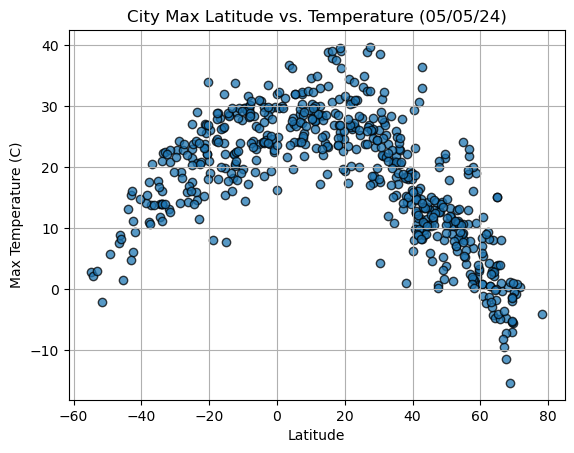

In [37]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature ' + time.strftime("(%x)"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

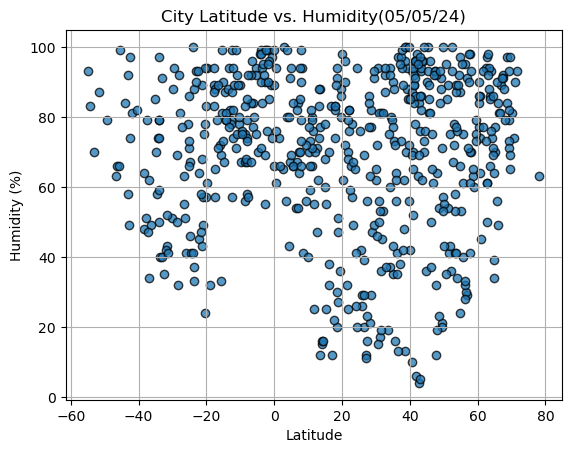

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity' + time.strftime("(%x)"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

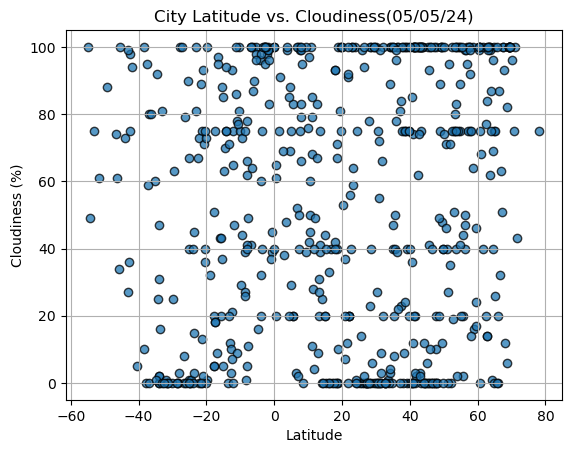

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness' + time.strftime("(%x)"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

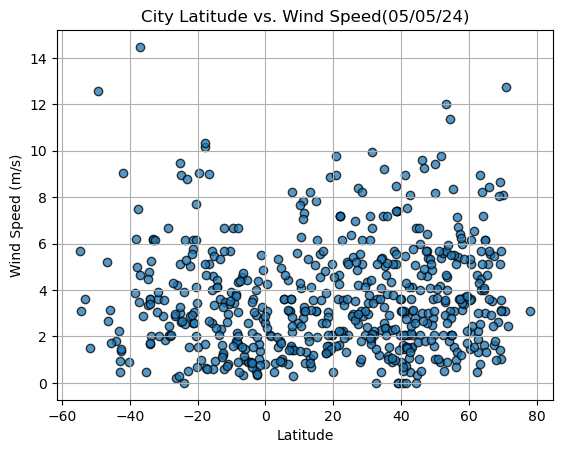

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed'+ time.strftime("(%x)"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [95]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, text_position):
    """
    Create a scatter plot with a linear regression line.

    Parameters:
    x_values (Series): The x values for the scatter plot.
    y_values (Series): The y values for the scatter plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    text_position (tuple): The position of the regression line equation on the plot.
    """
    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)

    # Get regression line equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, slope * x_values + intercept, 'r-')  # Regression line
    plt.annotate(line_eq, text_position, fontsize=15, color='red')  # Line equation
    
    
     # Add graph properties
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    

    # Show plot
    plt.show()

    return line_eq, r_value**2


In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,butterworth,5.3991,100.3638,32.03,66,20,3.60,MY,1714970113
2,kapa'a,22.0752,-159.3190,26.99,82,20,7.20,US,1714970114
3,vilyuchinsk,52.9306,158.4028,7.15,72,51,3.50,RU,1714970114
4,tlaltenango de sanchez roman,21.7833,-103.3167,20.16,25,91,1.64,MX,1714970114
6,sisimiut,66.9395,-53.6735,-9.44,89,63,3.54,GL,1714969880


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,28.99,74,75,6.69,CC,1714970113
5,adamstown,-25.0660,-130.1015,21.57,71,67,9.45,PN,1714970114
8,port-aux-francais,-49.3500,70.2167,5.84,79,88,12.57,TF,1714970115
11,papatowai,-46.5619,169.4708,7.54,63,74,5.21,NZ,1714970115
14,walvis bay,-22.9575,14.5053,11.53,93,100,0.51,NaN,1714970116


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7099984991053717


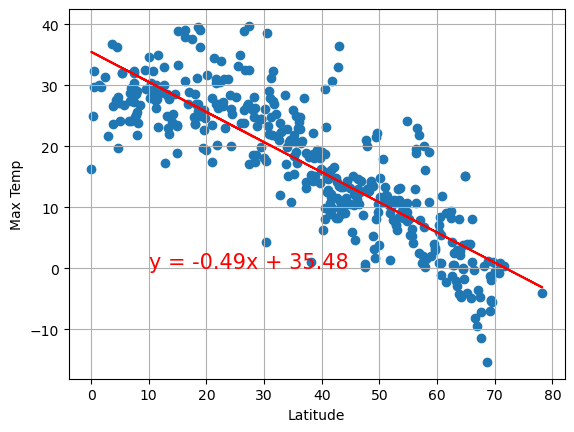

The regression line equation is: y = -0.49x + 35.48


In [115]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
    
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'
text_position = (10, 0)


print(f"The r-squared value is: {r_squared}")
# Call the function with the arguments
line_eq, r_squared = plot_linear_regression(x_values, y_values, xlabel, ylabel, text_position)
print(f"The regression line equation is: {line_eq}")

The r-squared value is: 0.7099984991053717


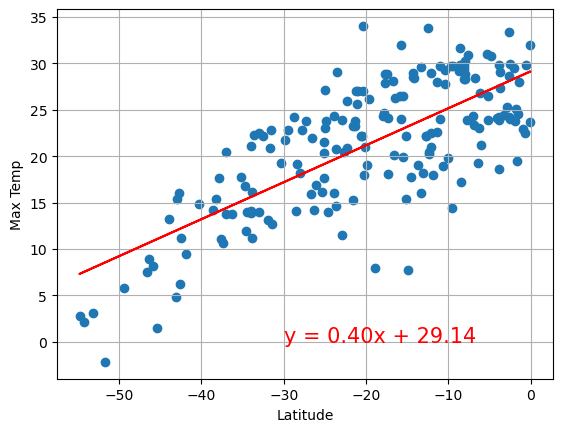

The regression line equation is: y = 0.40x + 29.14


In [116]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'
text_position = (-30, 0)


print(f"The r-squared value is: {r_squared}")
# Call the function with the arguments
line_eq, r_squared = plot_linear_regression(x_values, y_values, xlabel, ylabel, text_position)
print(f"The regression line equation is: {line_eq}")

**Discussion about the linear relationship:** YOUR RESPONSE 
Northern Hemisphere: R-squared value is 0.71 and Regression equation is y=−0.49x+35.48
Southern Hemisphere: R-squared value is 0.71 and Regression equation is y=0.40x+29.14

In both hemispheres, the r-squared value is the same, indicating that latitude explains 71% of the variation in temperature. The negative slope in the Northern Hemisphere means temperature decreases as latitude increases (moving away from the equator). The positive slope in the Southern Hemisphere means temperature increases as latitude increases (moving towards the equator). The intercepts (35.48 for the North and 29.14 for the South) give the predicted temperature at the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.5511798345927024


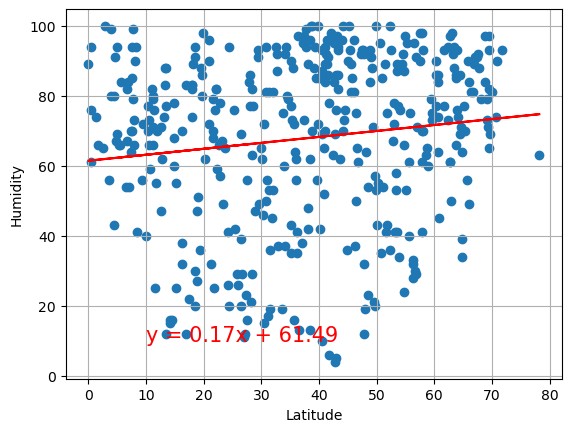

The regression line equation is: y = 0.17x + 61.49


In [117]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
text_position = (10, 10)


print(f"The r-squared value is: {r_squared}")
# Call the function with the arguments
line_eq, r_squared = plot_linear_regression(x_values, y_values, xlabel, ylabel, text_position)
print(f"The regression line equation is: {line_eq}")

The r-squared value is: 0.018107896347844387


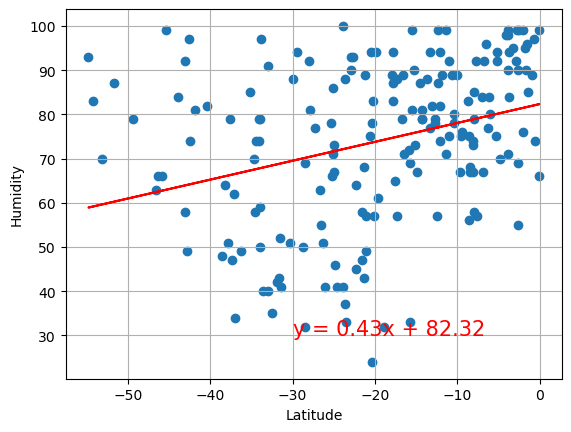

The regression line equation is: y = 0.43x + 82.32


In [118]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
text_position = (-30, 30)


print(f"The r-squared value is: {r_squared}")
# Call the function with the arguments
line_eq, r_squared = plot_linear_regression(x_values, y_values, xlabel, ylabel, text_position)
print(f"The regression line equation is: {line_eq}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere: R-squared value is 0.55 and Regression equation is  y=0.17x+61.49
Southern Hemisphere: R-squared value is 0.02 and Regression equation is y=0.43x+82.32

Latitude has a moderate impact on humidity in the Northern Hemisphere, but it is not a strong predictor in the Southern Hemisphere. Other factors likely play a more significant role in determining humidity levels in the South.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.0226134199333871


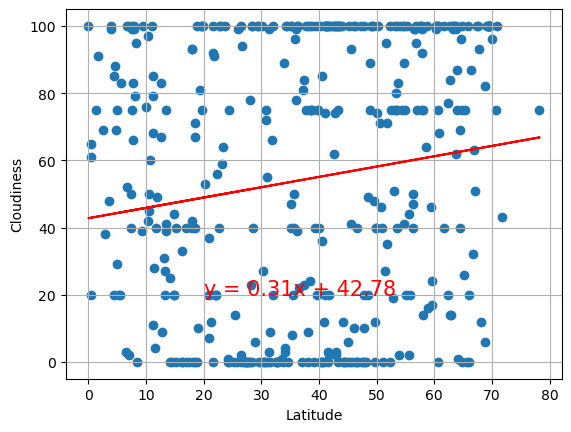

The regression line equation is: y = 0.31x + 42.78


In [120]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
text_position = (20, 20)


print(f"The r-squared value is: {r_squared}")
# Call the function with the arguments
line_eq, r_squared = plot_linear_regression(x_values, y_values, xlabel, ylabel, text_position)
print(f"The regression line equation is: {line_eq}")

The r-squared value is: 0.0226134199333871


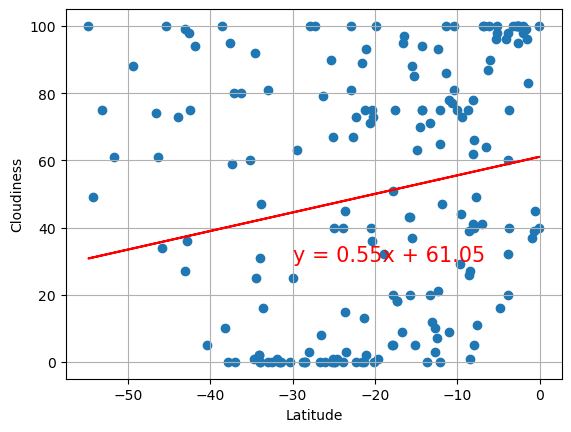

The regression line equation is: y = 0.55x + 61.05


In [121]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
text_position = (-30, 30)


print(f"The r-squared value is: {r_squared}")
# Call the function with the arguments
line_eq, r_squared = plot_linear_regression(x_values, y_values, xlabel, ylabel, text_position)
print(f"The regression line equation is: {line_eq}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere:  R-squared value is 0.02 and Regression equation is y=0.31x+42.78
Southern Hemisphere: R-squared value is 0.02 and Regression equation is y=0.55x+61.05

For both the Northern and Southern Hemispheres, the relationship between cloudiness and latitude is weak, as indicated by the r-squared value of about 0.02 in both cases. This means that only 2% of the variation in cloudiness can be explained by latitude, which is very low.

The slopes of the regression lines suggest a slight increase in cloudiness with latitude, but given the low r-squared values, latitude is not a strong predictor of cloudiness in either hemisphere. Other factors not accounted for in this analysis are likely influencing cloudiness more than latitude does.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.038881299682297504


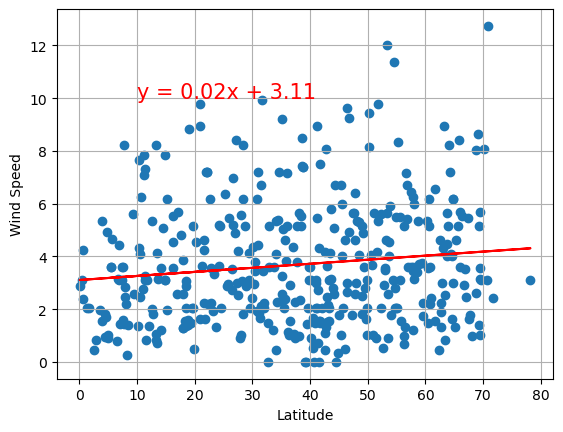

The regression line equation is: y = 0.02x + 3.11


In [122]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
text_position = (10, 10)


print(f"The r-squared value is: {r_squared}")
# Call the function with the arguments
line_eq, r_squared = plot_linear_regression(x_values, y_values, xlabel, ylabel, text_position)
print(f"The regression line equation is: {line_eq}")

The r-squared value is: 0.015946508230049943


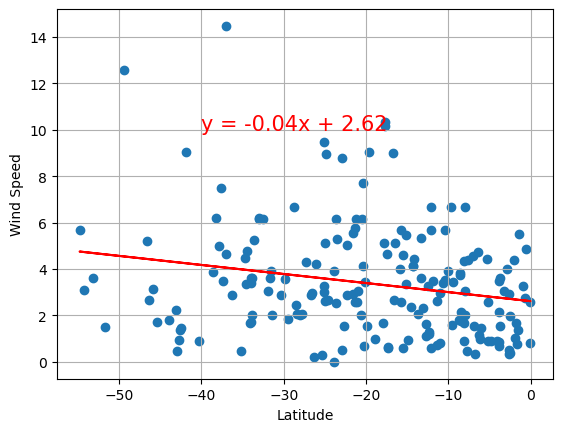

The regression line equation is: y = -0.04x + 2.62


In [123]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
text_position = (-40, 10)


print(f"The r-squared value is: {r_squared}")
# Call the function with the arguments
line_eq, r_squared = plot_linear_regression(x_values, y_values, xlabel, ylabel, text_position)
print(f"The regression line equation is: {line_eq}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The relationship between wind speed and latitude for both hemispheres is quite weak.

Northern Hemisphere: R-squared value is 0.04 and Regression equation is y=0.02x+3.11
Southern Hemisphere: R-squared value is 0.02 and Regression equation is y=−0.04x+2.62

The r-squared values indicate that latitude explains only 3.9% of the variation in wind speed for the Northern Hemisphere and even less, 1.6%, for the Southern Hemisphere. The regression equations show a very slight increase in wind speed with latitude in the North and a slight decrease in the South, but these trends are not strong due to the low r-squared values. Essentially, other factors not included in this analysis are likely more influential in determining wind speed than latitude.